In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The target variable for this analysis is the Median house value for california districts (median_house_value). The dataset is based on data from the 1990 California census. We are going to try to predict the median house value based on the other features in the dataset. The features are as follows:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. ocean_proximity: Location of the house in relation to the ocean/sea

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
housing.dropna(inplace=True)

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


We are going to split the data into training and testing sets, this is important because we want to train the model on one set of the data and evaluate it on another set of the data. We need some set of the data that the model has not seen before to evaluate how well it generalizes to new data. 

The purpose of a test set is to estimate the model's performance on new, unseen data. If we evaluate the model on the same data that we used to train the model, the model will perform well on the training data but will not generalize well to new data. This is called overfitting.

## Splitting the data

In [44]:
X = housing.drop("median_house_value", axis=1) #since we are dropping a column, we are using axis=1
y = housing["median_house_value"] #Target variable

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8) #The go to for train test split is 80/20

In [46]:
train_data = x_train.join(y_train) #Joining the training data
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17515,-121.93,37.33,44.0,1449.0,291.0,676.0,282.0,3.5750,<1H OCEAN,292200.0
11988,-117.51,34.00,36.0,3791.0,746.0,2258.0,672.0,3.2067,INLAND,124700.0
19142,-122.69,38.32,15.0,2536.0,414.0,1400.0,426.0,5.6613,<1H OCEAN,172400.0
4431,-118.19,34.08,38.0,1241.0,298.0,1055.0,263.0,2.3409,<1H OCEAN,115500.0
4356,-118.36,34.09,38.0,2158.0,582.0,1061.0,577.0,2.9643,<1H OCEAN,355300.0


## Exploring the data

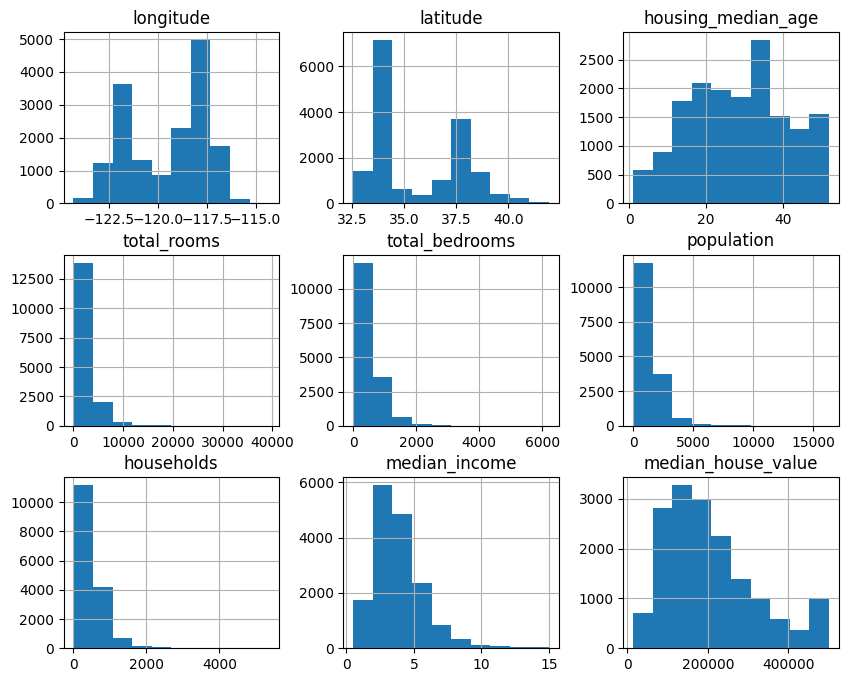

In [47]:
train_data.hist(figsize=(10,8)); #Plotting the histogram of the features in the training data

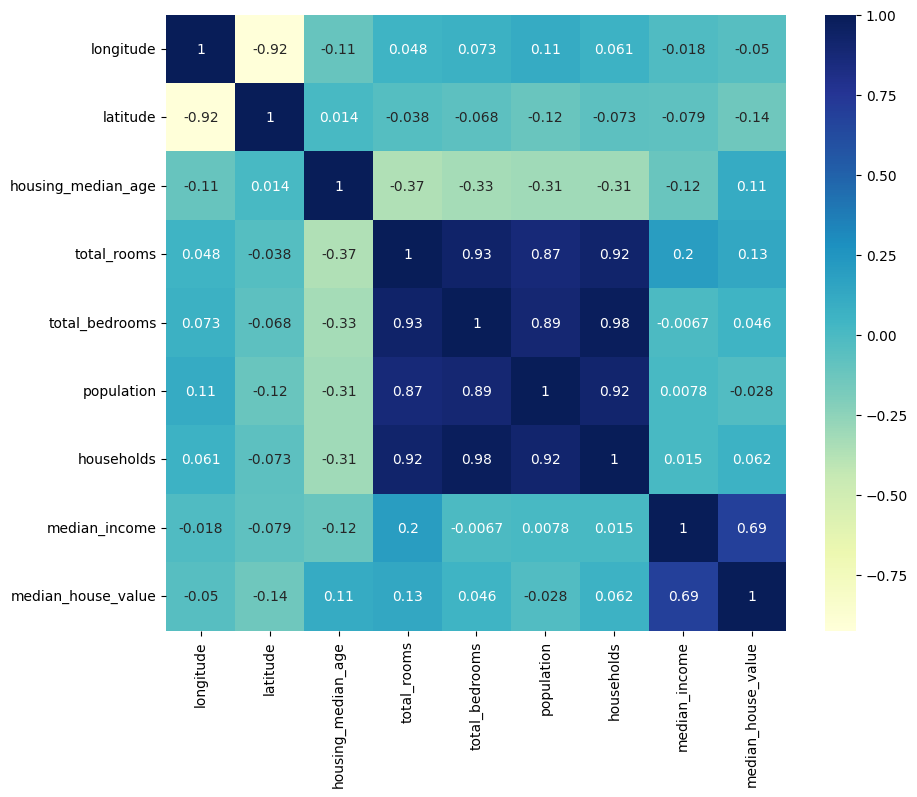

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu'); #Plotting the correlation matrix


We can see that median_income and median_house_value are very correlated with 0.69. This is an interesting variable, it could be a great predictor to look at for predicting median house value.

The latitude on the other hand is negatively correlated with the median house value. This is interesting because it suggests that the further north you go, the lower the median house value. This could be because of the location of the houses, maybe the houses that are further north are in less desirable locations.

## Preprocessing the data

Some of the features like total_rooms, total_bedrooms, population, households are very left skewed. So we take the log of these features to make them more normally distributed.

In [49]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1 # Adding 1 to avoid log(0)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) +1
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) + 1

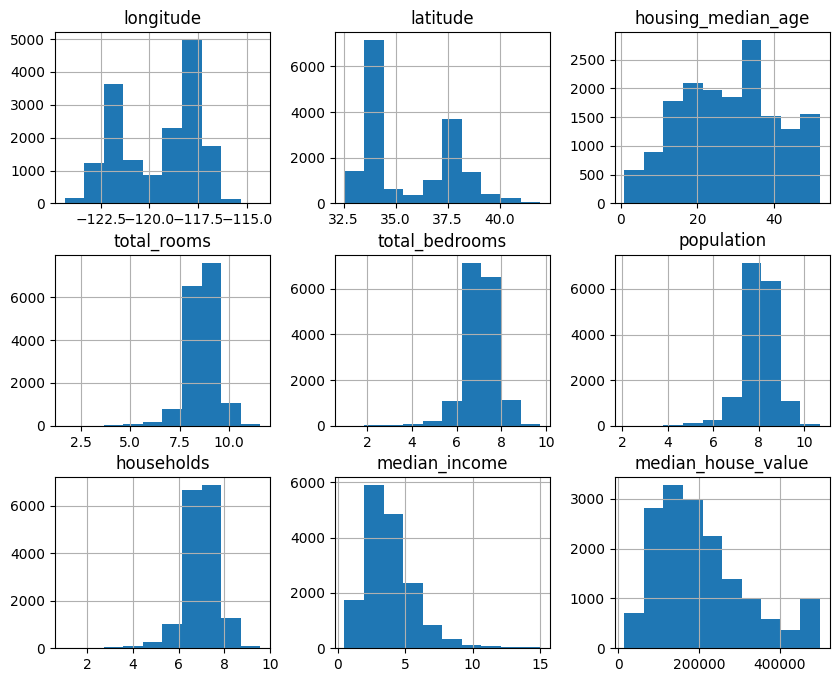

In [50]:
train_data.hist(figsize=(10,8)); #Plotting the histogram of the features in the training data after log transformation

Now those features are more normally distributed. We can see that the distribution of the features is more symmetric and the outliers are less extreme.

In [51]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7252
INLAND        5214
NEAR OCEAN    2077
NEAR BAY      1798
ISLAND           5
Name: count, dtype: int64

ocean_proximity is a categorical variable which could be useful in our analysis. To use this feature in our analysis we need to convert it to a numerical variable to be used in a regression model. We can use one-hot encoding to convert the categorical variable to a numerical variable.

In [52]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], dtype=int)).drop('ocean_proximity', axis=1)#One hot encoding the ocean_proximity column and dropping the original column
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17515,-121.93,37.33,44.0,8.278629,6.673323,7.516193,6.641907,3.5750,292200.0,1,0,0,0,0
11988,-117.51,34.00,36.0,9.240385,7.614726,8.722235,7.510258,3.2067,124700.0,0,1,0,0,0
19142,-122.69,38.32,15.0,8.838343,7.025866,8.244228,7.054439,5.6613,172400.0,1,0,0,0,0
4431,-118.19,34.08,38.0,8.123673,6.697093,7.961296,6.572154,2.3409,115500.0,1,0,0,0,0
4356,-118.36,34.09,38.0,8.676937,7.366470,7.966967,7.357842,2.9643,355300.0,1,0,0,0,0


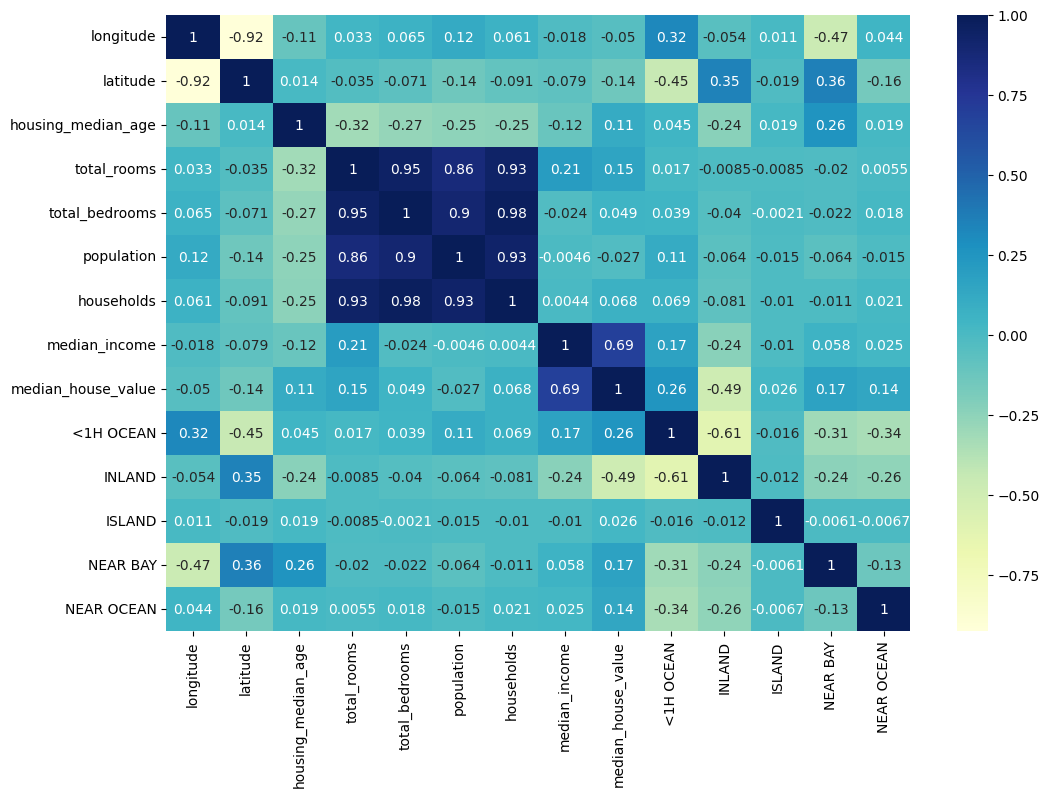

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu'); #Plotting the correlation ti include the one hot encoded features

For the 5 one-hot encoded ocean proximity categories, we now have correlation values for each of the categories. 

<1H Ocean has a correlation of 0.26 with the median house value
Inland has a correlation of -0.48 with the median house value
Island has a correlation of 0.02 with the median house value
Near Bay has a correlation of 0.16 with the median house value
Near Ocean has a correlation of 0.14 with the median house value

Inland has the highest negative correlation with the median house value. This suggests that houses that are inland have a lower median house value. This could be because houses that are inland are further away from the ocean and are in less desirable locations. On the other hand, <1H Ocean has the highest positive correlation with the median house value. This suggests that houses that are less than 1 hour away from the ocean have a higher median house value. This could be because houses that are closer to the ocean are in more desirable locations.

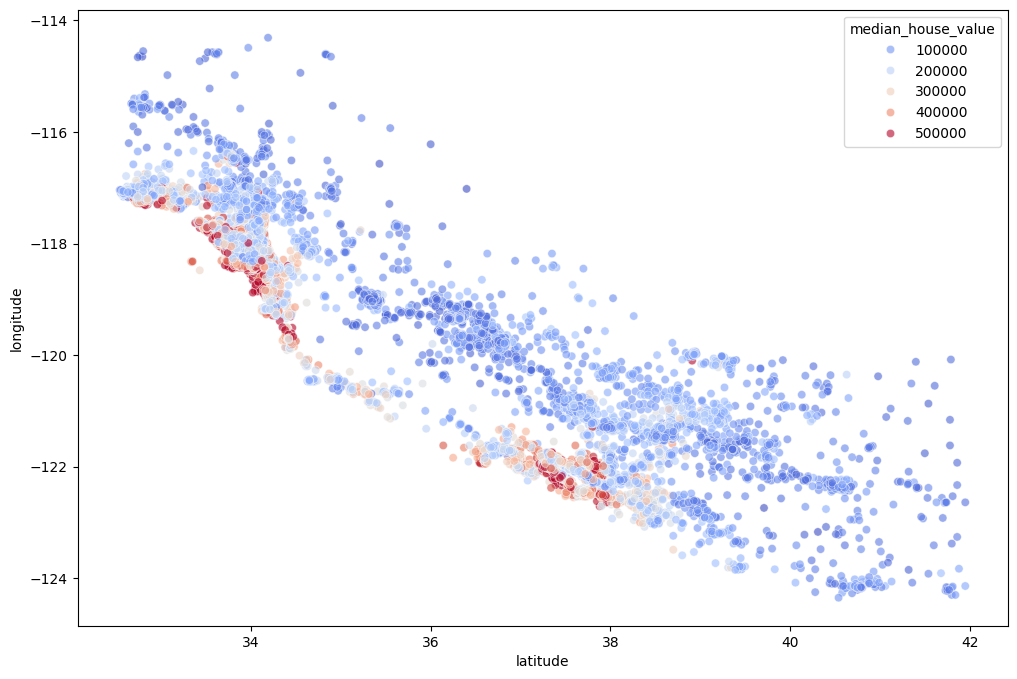

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm', alpha=0.6); #Plotting the scatter plot of latitude and longitude, color is set to median house value

The vales with lower latitude and longitude are closer to the water and have higher median house values.

## Feature Engineering

In [55]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms'] #Creating a new feature bedroom_ratio
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] #Creating a new feature household_rooms
train_data['population_household'] = train_data['population'] / train_data['households'] #Creating a new feature population_household

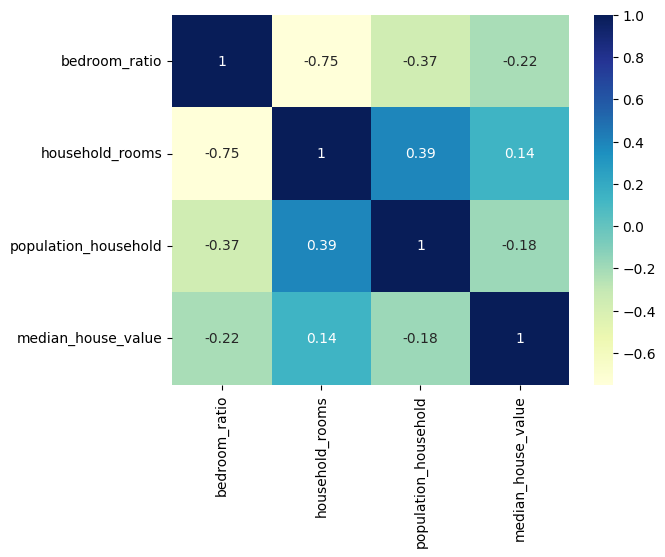

In [56]:
sns.heatmap(train_data[['bedroom_ratio', 'household_rooms', 'population_household', 'median_house_value']].corr(), annot=True, cmap='YlGnBu'); #Plotting the correlation matrix of the new features and the target variable

The features households and total bedrooms were not interested on their own with correlations of 0.07 and 0.05 respectively. 

## Train the Linear Regression Model

In [57]:
X = train_data.drop('median_house_value', axis=1)
y = train_data['median_house_value']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train_s = scaler.fit_transform(X_train) #Scaling the training data, we don't need to fit the scaler to the test data

model = LinearRegression()

model.fit(X_train_s, y_train) #fitting the model with scaled training data


LinearRegression()

In [58]:
test_data = X_test.join(y_test) #Joining the test data

test_data['total_rooms'] = np.log(test_data['total_rooms']) + 1 # Adding 1 to avoid log(0)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']) +1
test_data['population'] = np.log(test_data['population']) + 1
test_data['households'] = np.log(test_data['households']) + 1

#test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype=int)).drop('ocean_proximity', axis=1)#One hot encoding the ocean_proximity column and dropping the original column

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms'] #Creating a new feature bedroom_ratio
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households'] #Creating a new feature household_rooms
test_data['population_household'] = test_data['population'] / test_data['households'] #Creating a new feature population_household


In [59]:
test_data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,population_household,median_house_value
5753,-118.27,34.18,52.0,3.199182,2.946817,3.086225,2.944332,6.2976,1,0,0,0,0,0.921116,1.086556,1.048192,498400.0
20477,-118.74,34.28,21.0,3.230869,3.009122,3.150345,3.008489,5.9024,1,0,0,0,0,0.931366,1.073918,1.047152,221000.0
9958,-122.33,38.39,36.0,3.044155,2.758551,2.887948,2.738947,6.3427,0,1,0,0,0,0.906180,1.111433,1.054401,304800.0
1565,-121.93,37.78,2.0,2.860189,2.516302,2.746797,2.587564,3.1591,1,0,0,0,0,0.879768,1.105359,1.061537,434700.0
7691,-118.11,33.95,34.0,3.168927,2.918560,3.060124,2.927882,6.4319,1,0,0,0,0,0.920993,1.082328,1.045167,452300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,-122.16,37.86,36.0,3.210404,2.974152,3.100295,2.971302,8.1586,0,0,0,1,0,0.926410,1.080471,1.043413,404300.0
11140,-117.95,33.84,32.0,3.107590,2.973870,3.090844,2.960770,3.4028,1,0,0,0,0,0.956970,1.049589,1.043933,183700.0
15669,-122.44,37.80,52.0,3.124078,2.967494,3.024310,2.960770,3.2447,0,0,0,1,0,0.949879,1.055157,1.021461,500001.0
1251,-122.17,39.31,35.0,3.189882,2.989729,3.109079,2.969266,2.5625,0,1,0,0,0,0.937254,1.074300,1.047087,62700.0


In [60]:
X_test_s = scaler.transform(X_test) #Scaling the test data

In [61]:
model.score(X_test_s, y_test)

0.6632885828471788

The model score is 0.64 which is not very high. This means that the model explains 64% of the variance in the median house value. This is not a very high score, but it is better than nothing. We can use this model to make predictions about the median house value based on the other features in the dataset.